In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('turboAzInfoCleanedData.csv')

In [3]:
df

,Unnamed: 0,Şəhər,Marka,Model,İl,Ban Növü,Rəng,Mühərrik,Mühərrikin gücü,Yanacaq növü,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Qiymət
0,0,Sumqayıt,Nissan,Tiida,2012,Sedan,Ağ,1.5,109,Benzin,53235,Avtomat,Ön,Xeyr,14900
1,1,Bakı,Haval,H6,2022,Offroader / SUV,Ağ,1.5,243,Hibrid,0,Avtomat,Ön,Bəli,58900
2,2,Bakı,Mercedes,E 220,2012,Sedan,Ağ,2.2,170,Dizel,208000,Avtomat,Arxa,Xeyr,33800
3,3,Bakı,Renault,Kaptur,2021,Offroader / SUV,Ağ,1.6,114,Benzin,0,Avtomat,Ön,Bəli,39780
4,4,Bakı,BMW,X6 M,2010,Offroader / SUV,Boz,4.4,555,Benzin,210000,Avtomat,Tam,Xeyr,37060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14393,14395,Lənkəran,LADA (VAZ),2106,1991,Sedan,Bej,1.6,75,Benzin,37707,Mexaniki,Arxa,Xeyr,2900
14394,14396,Bakı,Mitsubishi,Pajero,1995,Offroader / SUV,Gümüşü,2.8,125,Dizel,447504,Avtomat,Tam,Xeyr,11500
14395,14397,Bakı,Toyota,Prado,2007,Offroader / SUV,Qara,4.0,249,Benzin,206500,Avtomat,Arxa,Xeyr,35000
14396,14398,Bakı,Opel,Astra,2007,Hetçbek,Boz,1.4,90,Benzin,178000,Mexaniki,Ön,Xeyr,12500


In [4]:
df.columns

Index(['Unnamed: 0', 'Şəhər', 'Marka', 'Model', 'İl', 'Ban Növü', 'Rəng',
       'Mühərrik', 'Mühərrikin gücü', 'Yanacaq növü', 'Yürüş',
       'Sürətlər qutusu', 'Ötürücü', 'Yeni', 'Qiymət'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0','Şəhər','Ban Növü','Mühərrikin gücü','Ötürücü','Yeni'],axis=1,inplace=True)

In [6]:
df.rename(columns = {'Yanacaq növü':'Yanacaq_növü', 'Sürətlər qutusu':'Sürətlər_qutusu' },
          inplace = True)

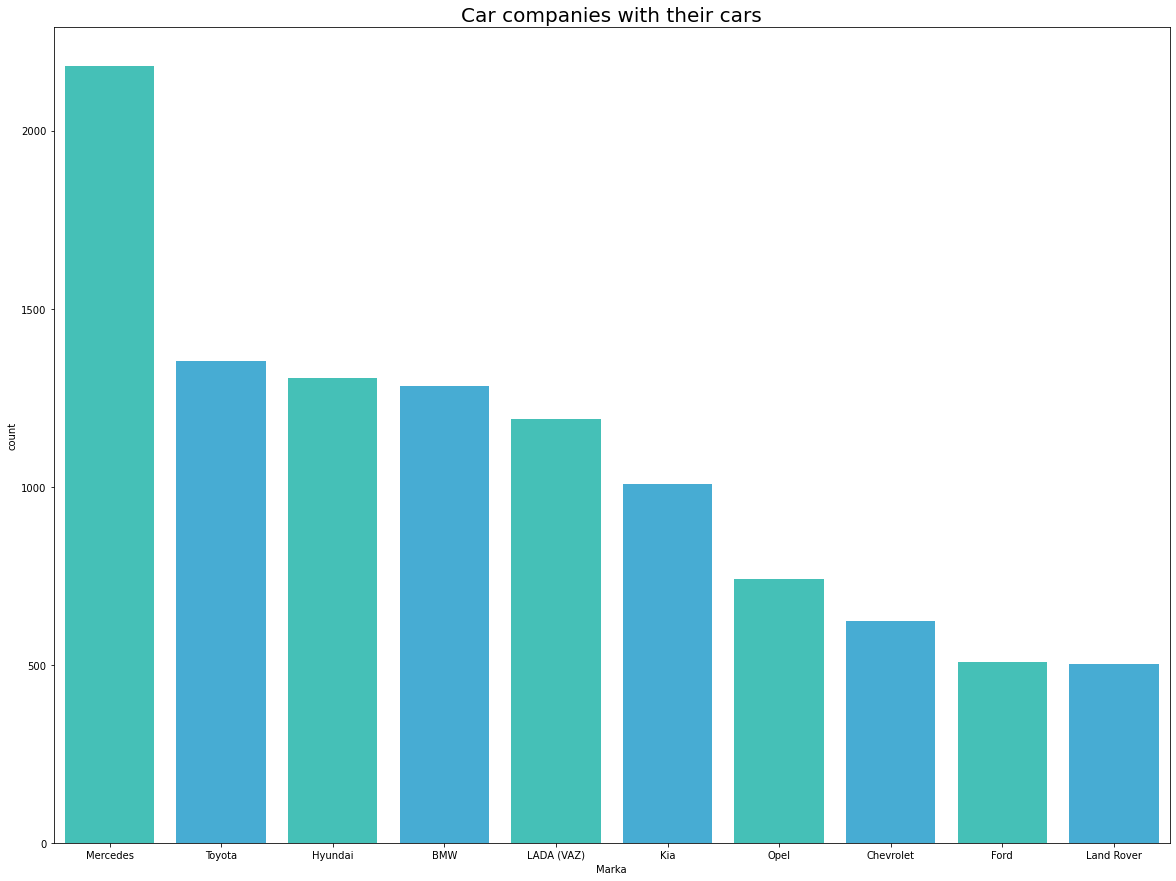

In [7]:
plt.figure(figsize = (20, 15))
sns.countplot(x = df.Marka,palette=['#30D5C8',"#30b6eA"],order=(df.Marka.value_counts()/sum(df.Marka.value_counts())*100).iloc[:10].index)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


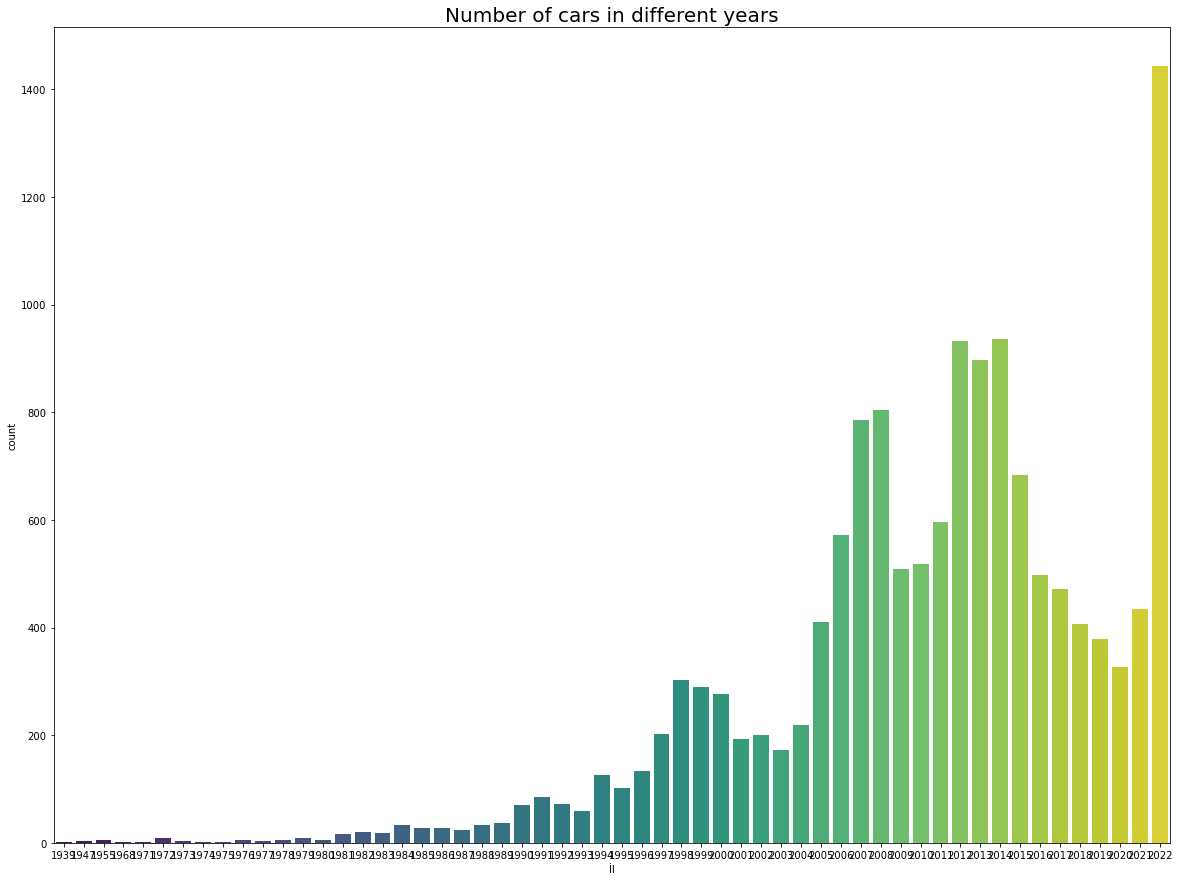

In [8]:
plt.figure(figsize = (20, 15))
sns.countplot(df.İl, palette = 'viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Sürətlər_qutusu', ylabel='count'>

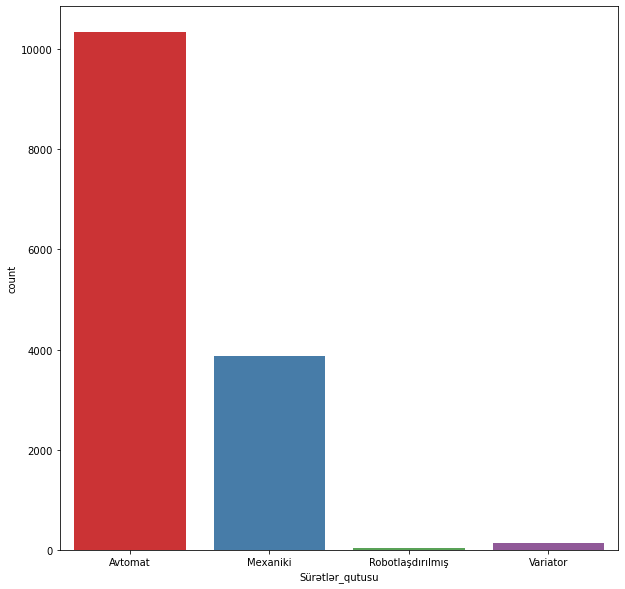

In [9]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Sürətlər_qutusu', data = df, palette = 'Set1')

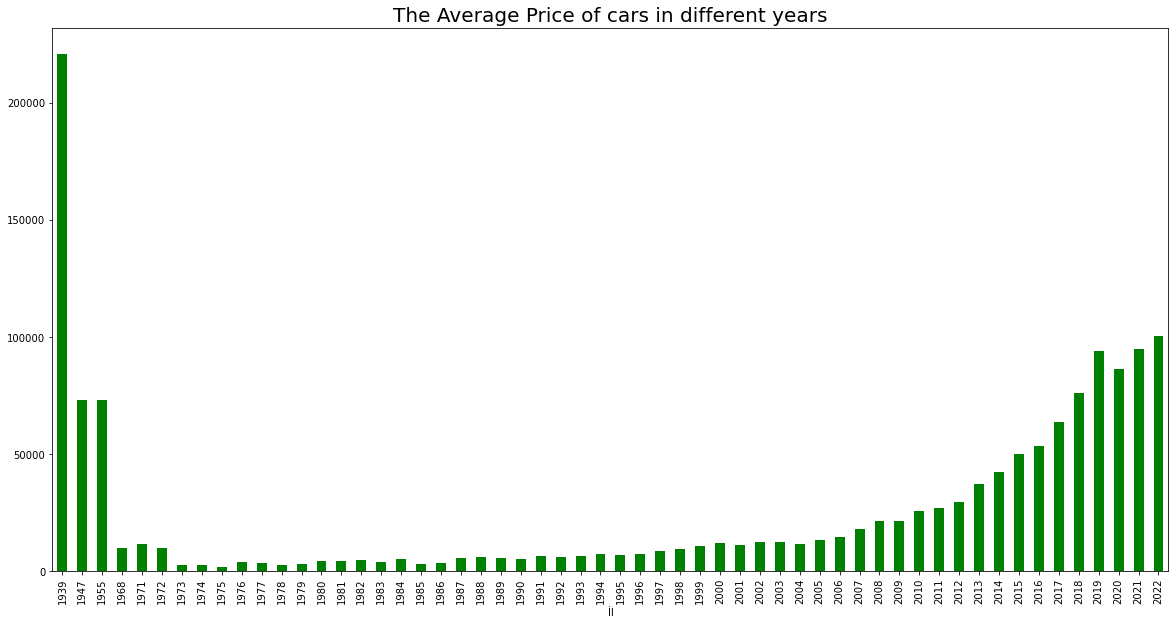

In [10]:
plt.figure(figsize = (20, 10))
df.groupby('İl')['Qiymət'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

In [11]:
df=df[df['İl']>1970]

In [13]:
for i in range(len(df['Yürüş'])):
    if df['Yürüş'][i]<10000:
        df.at[i,'Yürüş']=1
    elif df['Yürüş'][i]>10000 and df['Yürüş'][i]<25000:
        df.at[i,'Yürüş']=2
    elif df['Yürüş'][i]>25000 and df['Yürüş'][i]<50000:
        df.at[i,'Yürüş']=3
    elif df['Yürüş'][i]>50000 and df['Yürüş'][i]<75000:
        df.at[i,'Yürüş']=4
    elif df['Yürüş'][i]>75000 and df['Yürüş'][i]<100000:
        df.at[i,'Yürüş']=5
    elif df['Yürüş'][i]>100000 and df['Yürüş'][i]<125000:
        df.at[i,'Yürüş']=6
    elif df['Yürüş'][i]>125000 and df['Yürüş'][i]<150000:
        df.at[i,'Yürüş']=7
    elif df['Yürüş'][i]>150000 and df['Yürüş'][i]<175000:
        df.at[i,'Yürüş']=8
    elif df['Yürüş'][i]>175000 and df['Yürüş'][i]<200000:
        df.at[i,'Yürüş']=9
    elif df['Yürüş'][i]>200000 and df['Yürüş'][i]<250000:
        df.at[i,'Yürüş']=10
    elif df['Yürüş'][i]>250000 and df['Yürüş'][i]<300000:
        df.at[i,'Yürüş']=11
    elif df['Yürüş'][i]>300000 and df['Yürüş'][i]<500000:
        df.at[i,'Yürüş']=12
    elif df['Yürüş'][i]>500000 and df['Yürüş'][i]<1000000:
        df.at[i,'Yürüş']=13
    else:
        df.at[i,'Yürüş']=14

KeyError: 1156

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [12]:
dummies_Marka = pd.get_dummies(df.Marka)
dummies_Model = pd.get_dummies(df.Model)
dummies_Rəng = pd.get_dummies(df.Rəng)
dummies_Yanacaq_növü = pd.get_dummies(df.Yanacaq_növü)
dummies_Sürətlər_qutusu = pd.get_dummies(df.Sürətlər_qutusu)

In [13]:
# Concatenate the dummies 
categoric_cols = pd.concat([dummies_Marka, dummies_Model,
                            dummies_Rəng,dummies_Yanacaq_növü,
                            dummies_Sürətlər_qutusu], axis='columns')

In [14]:
df

,Marka,Model,İl,Rəng,Mühərrik,Yanacaq_növü,Yürüş,Sürətlər_qutusu,Qiymət
0,Nissan,Tiida,2012,Ağ,1.5,Benzin,4,Avtomat,14900
1,Haval,H6,2022,Ağ,1.5,Hibrid,1,Avtomat,58900
2,Mercedes,E 220,2012,Ağ,2.2,Dizel,10,Avtomat,33800
3,Renault,Kaptur,2021,Ağ,1.6,Benzin,1,Avtomat,39780
4,BMW,X6 M,2010,Boz,4.4,Benzin,10,Avtomat,37060
...,...,...,...,...,...,...,...,...,...
14393,LADA (VAZ),2106,1991,Bej,1.6,Benzin,3,Mexaniki,2900
14394,Mitsubishi,Pajero,1995,Gümüşü,2.8,Dizel,12,Avtomat,11500
14395,Toyota,Prado,2007,Qara,4.0,Benzin,10,Avtomat,35000
14396,Opel,Astra,2007,Boz,1.4,Benzin,9,Mexaniki,12500


In [15]:
df.drop(['Marka','Model','Rəng','Yanacaq_növü','Sürətlər_qutusu'],axis=1,inplace=True)

In [16]:
df

,İl,Mühərrik,Yürüş,Qiymət
0,2012,1.5,4,14900
1,2022,1.5,1,58900
2,2012,2.2,10,33800
3,2021,1.6,1,39780
4,2010,4.4,10,37060
...,...,...,...,...
14393,1991,1.6,3,2900
14394,1995,2.8,12,11500
14395,2007,4.0,10,35000
14396,2007,1.4,9,12500


In [17]:
df_final=pd.concat([categoric_cols,df], axis='columns')

In [18]:
X=df_final.iloc[:,:-1]
y=df_final.iloc[:,-1]

In [19]:
y

0        14900
1        58900
2        33800
3        39780
4        37060
         ...  
14393     2900
14394    11500
14395    35000
14396    12500
14397    12300
Name: Qiymət, Length: 14398, dtype: int64

In [20]:
X

,Abarth,Alfa Romeo,Audi,BMW,BYD,Baic,Bajaj,Bentley,Bestune,Brilliance,...,Hibrid,Plug-in Hibrid,Qaz,Avtomat,Mexaniki,Robotlaşdırılmış,Variator,İl,Mühərrik,Yürüş
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2012,1.5,4
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,2022,1.5,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2012,2.2,10
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2021,1.6,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2010,4.4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1991,1.6,3
14394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1995,2.8,12
14395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2007,4.0,10
14396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2007,1.4,9


In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [22]:
len(X_train)

11518

In [23]:
len(y_train)

11518

In [24]:
model=DecisionTreeRegressor()

In [25]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [26]:
model.score(X_train,y_train)

0.9980934165505904

In [27]:
model.score(X_test,y_test)

0.9690338054773031

In [28]:
import pickle
document="myModel"
pickle.dump(model,open(document,"wb"))

In [30]:
list_of_columns=df_final.columns

In [31]:
L=[]

In [32]:
L=list(list_of_columns)

In [33]:
L

['Abarth',
 'Alfa Romeo',
 'Audi',
 'BMW',
 'BYD',
 'Baic',
 'Bajaj',
 'Bentley',
 'Bestune',
 'Brilliance',
 'Cadillac',
 'Changan',
 'Chery',
 'Chevrolet',
 'Chrysler',
 'Citroen',
 'DAF',
 'Dacia',
 'Daewoo',
 'Dayun',
 'Dnepr',
 'Dodge',
 'DongFeng',
 'FAW',
 'Fiat',
 'Ford',
 'Foton',
 'GAC',
 'GAZ',
 'GMC',
 'Geely',
 'Great Wall',
 'HOWO',
 'Haima',
 'Haojue',
 'Harley-Davidson',
 'Haval',
 'Honda',
 'Hongqi',
 'Hummer',
 'Hyundai',
 'IJ',
 'Infiniti',
 'Iran Khodro',
 'Isuzu',
 'Iveco',
 'JAC',
 'Jaguar',
 'Jeep',
 'Jetour',
 'KAIYI',
 'KamAz',
 'Kawasaki',
 'Kayo',
 'Khazar',
 'Kia',
 'Kuba',
 'LADA (VAZ)',
 'Lamborghini',
 'Land Rover',
 'Lexus',
 'Lifan',
 'Lincoln',
 'LuAz',
 'MAN',
 'MAZ',
 'MG',
 'Mack',
 'Maserati',
 'Mazda',
 'McLaren',
 'Mercedes',
 'Mercedes-Maybach',
 'Mini',
 'Minsk',
 'Mitsubishi',
 'Moskvich',
 'Muravey',
 'Nissan',
 'Opel',
 'PAZ',
 'Peugeot',
 'Polaris',
 'Polestar',
 'Porsche',
 'RKS',
 'Ravon',
 'Renault',
 'Rolls-Royce',
 'Rover',
 'SEAT',
 '

In [34]:
with open('columns.txt', 'w+',encoding="utf-8") as f:
     
    # write elements of list
    for items in L:
        f.write('%s\n' %items)

In [55]:
Row_list=[]
for rows in df_final.itertuples():
    # Create list for the current row
    my_list =[rows]
      
    # append the list to the final list
    Row_list.append(my_list)

In [74]:
predict_list=[]
for i in range(1,999):
    predict_list.append(Row_list[887][0][i])
    

In [87]:
model.predict(X_test)

array([11200.,  6700.,  9300., ..., 15800., 34500.,  5600.])

In [98]:
columns=np.array(X_test.columns)

In [99]:
columns

array(['Abarth', 'Alfa Romeo', 'Audi', 'BMW', 'BYD', 'Baic', 'Bajaj',
       'Bentley', 'Bestune', 'Brilliance', 'Cadillac', 'Changan', 'Chery',
       'Chevrolet', 'Chrysler', 'Citroen', 'DAF', 'Dacia', 'Daewoo',
       'Dayun', 'Dnepr', 'Dodge', 'DongFeng', 'FAW', 'Fiat', 'Ford',
       'Foton', 'GAC', 'GAZ', 'GMC', 'Geely', 'Great Wall', 'HOWO',
       'Haima', 'Haojue', 'Harley-Davidson', 'Haval', 'Honda', 'Hongqi',
       'Hummer', 'Hyundai', 'IJ', 'Infiniti', 'Iran Khodro', 'Isuzu',
       'Iveco', 'JAC', 'Jaguar', 'Jeep', 'Jetour', 'KAIYI', 'KamAz',
       'Kawasaki', 'Kayo', 'Khazar', 'Kia', 'Kuba', 'LADA (VAZ)',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'LuAz',
       'MAN', 'MAZ', 'MG', 'Mack', 'Maserati', 'Mazda', 'McLaren',
       'Mercedes', 'Mercedes-Maybach', 'Mini', 'Minsk', 'Mitsubishi',
       'Moskvich', 'Muravey', 'Nissan', 'Opel', 'PAZ', 'Peugeot',
       'Polaris', 'Polestar', 'Porsche', 'RKS', 'Ravon', 'Renault',
       'Rolls-Royce', 'Rove

In [114]:
X_test

,Abarth,Alfa Romeo,Audi,BMW,BYD,Baic,Bajaj,Bentley,Bestune,Brilliance,...,Hibrid,Plug-in Hibrid,Qaz,Avtomat,Mexaniki,Robotlaşdırılmış,Variator,İl,Mühərrik,Yürüş
10960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2007,1.4,170
1796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2005,1.6,140000
2446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2013,1.6,165000
10149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2015,4.6,185000
5915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2013,5.0,136000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2010,2.0,185000
5817,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2007,4.2,289000
7515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2011,1.4,177000
7676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2007,4.7,230000
